In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("hotel_bookings.csv")



In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


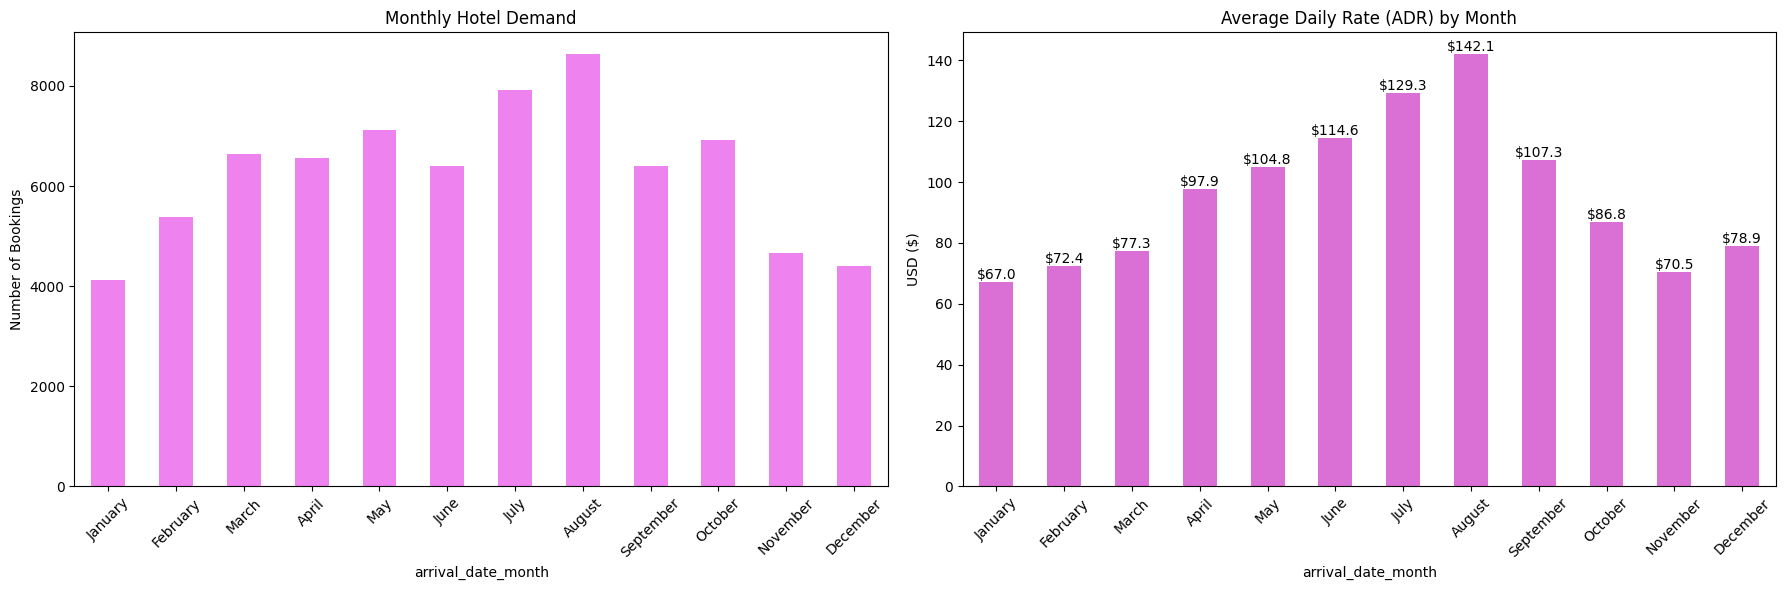

--- Demand Analysis ---
Most bookings: August
Least bookings: January

--- Pricing Analysis ---
Highest ADR: August ($142.1)
Lowest ADR: January ($67.0)


In [19]:
# Load data and filter out canceled bookings
df = pd.read_csv("hotel_bookings.csv")
df = df[df['is_canceled'] == 0]  # Remove cancellations

# Define month order
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Calculate monthly bookings
monthly_bookings = df['arrival_date_month'].value_counts().reindex(months)

# Calculate average daily rate (ADR) per month
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex(months)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Monthly Bookings
monthly_bookings.plot(kind='bar', ax=ax1, color='violet', title='Monthly Hotel Demand')
ax1.set_ylabel('Number of Bookings')
ax1.tick_params(axis='x', rotation=45)

# Chart 2: Average Daily Rate
monthly_adr.plot(kind='bar', ax=ax2, color='orchid', title='Average Daily Rate (ADR) by Month')
ax2.set_ylabel('USD ($)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels to ADR chart
for idx, value in enumerate(monthly_adr):
    ax2.text(idx, value, f'${value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print key statistics
print('--- Demand Analysis ---')
print('Most bookings:', monthly_bookings.idxmax())
print('Least bookings:', monthly_bookings.idxmin())

print('\n--- Pricing Analysis ---')
print('Highest ADR:', monthly_adr.idxmax(), f'(${monthly_adr.max():.1f})')
print('Lowest ADR:', monthly_adr.idxmin(), f'(${monthly_adr.min():.1f})')

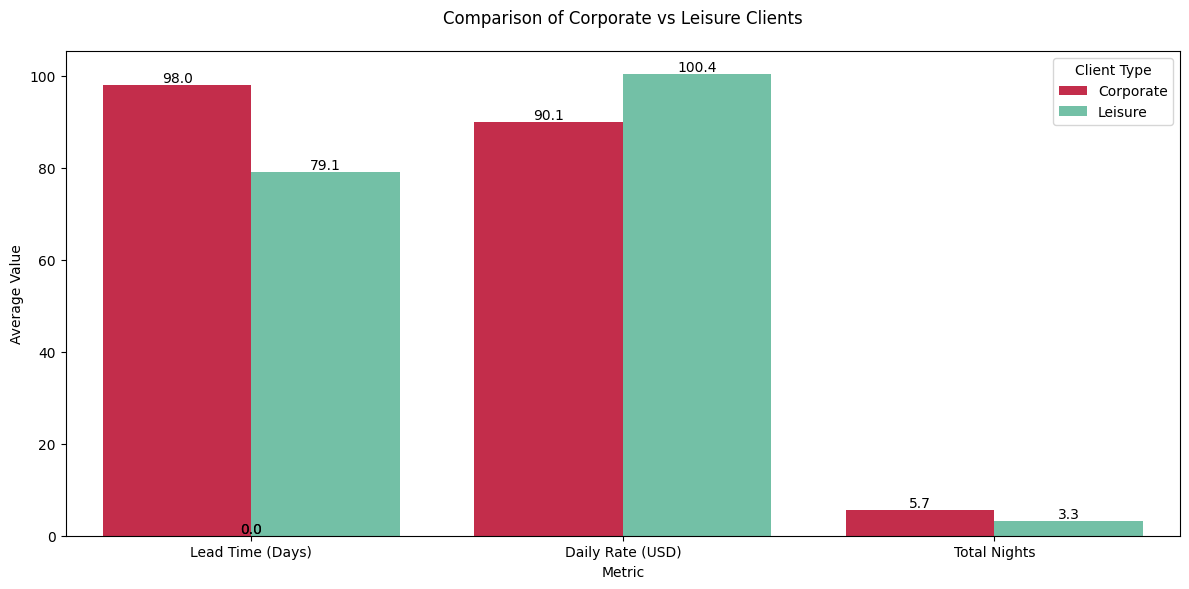

In [ ]:
# Load and preprocess data
df = pd.read_csv('hotel_bookings.csv')
df = df[df['is_canceled'] == 0]  # Remove canceled bookings
df = df.dropna(subset=['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'customer_type'])

# Categorize client types
df['client_type'] = df['customer_type'].apply(
    lambda x: 'Corporate' if x in ['Contract', 'Group'] else 'Leisure'
)

# Calculate total nights
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Calculate averages
avg_stats = df.groupby('client_type').agg(
    avg_lead_time=('lead_time', 'mean'),
    avg_adr=('adr', 'mean'),
    avg_total_nights=('total_nights', 'mean')
).reset_index()

# Melt data for easier plotting
melted_stats = avg_stats.melt(id_vars='client_type', var_name='metric', value_name='value')

# Create visualization
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='metric',
    y='value',
    hue='client_type',
    data=melted_stats,
    palette=['crimson', 'mediumaquamarine']  # Corporate (red), Leisure (aquamarine)
)

# Customize labels and titles
plt.title('Comparison of Corporate vs Leisure Clients', pad=20)
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Lead Time (Days)', 'Daily Rate (USD)', 'Total Nights']
)

# Add value labels
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{height:.1f}',
        (bar.get_x() + bar.get_width()/2, height),
        ha='center', va='bottom'
    )

plt.legend(title='Client Type')
plt.tight_layout()
plt.show()

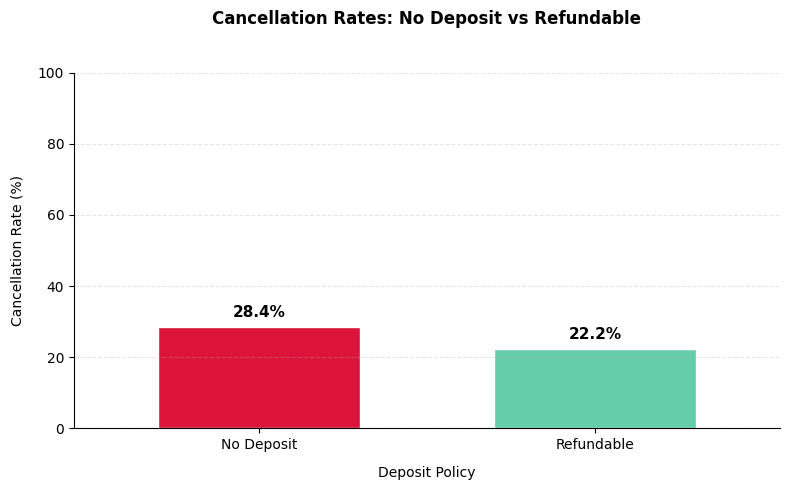


Key Insight: Refundable deposits reduce cancellations by 6.2 percentage points
compared to No Deposit bookings.


In [23]:
# Load and filter data
df = pd.read_csv("hotel_bookings.csv")
focus_deposits = ['No Deposit', 'Refundable']
analysis_df = df[df['deposit_type'].isin(focus_deposits)].copy()

# Calculate cancellation rates (as percentages)
cancel_rates = (analysis_df.groupby('deposit_type')['is_canceled']
                 .mean()
                 .mul(100)
                 .sort_values(ascending=False))  # Sort by highest rate first

# Create the visualization
plt.figure(figsize=(8, 5))
ax = cancel_rates.plot(
    kind='bar',
    color=['crimson', 'mediumaquamarine'],  # Red=No Deposit, aquamarine=Refundable
    width=0.6,
    edgecolor='white'
)

# Formatting
plt.title('Cancellation Rates: No Deposit vs Refundable\n', weight='bold', pad=20)
plt.xlabel('Deposit Policy', labelpad=10)
plt.ylabel('Cancellation Rate (%)', labelpad=10)
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Full percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add precise value labels
for i, rate in enumerate(cancel_rates):
    ax.text(i, rate + 3, f"{rate:.1f}%", 
           ha='center', 
           fontsize=11,
           weight='bold')

# Clean up borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Calculate and print the key insight
rate_diff = cancel_rates['No Deposit'] - cancel_rates['Refundable']
print(f"\nKey Insight: Refundable deposits reduce cancellations by {rate_diff:.1f} percentage points")
print(f"compared to No Deposit bookings.")

Correlation between lead time and cancellation rate:0.29


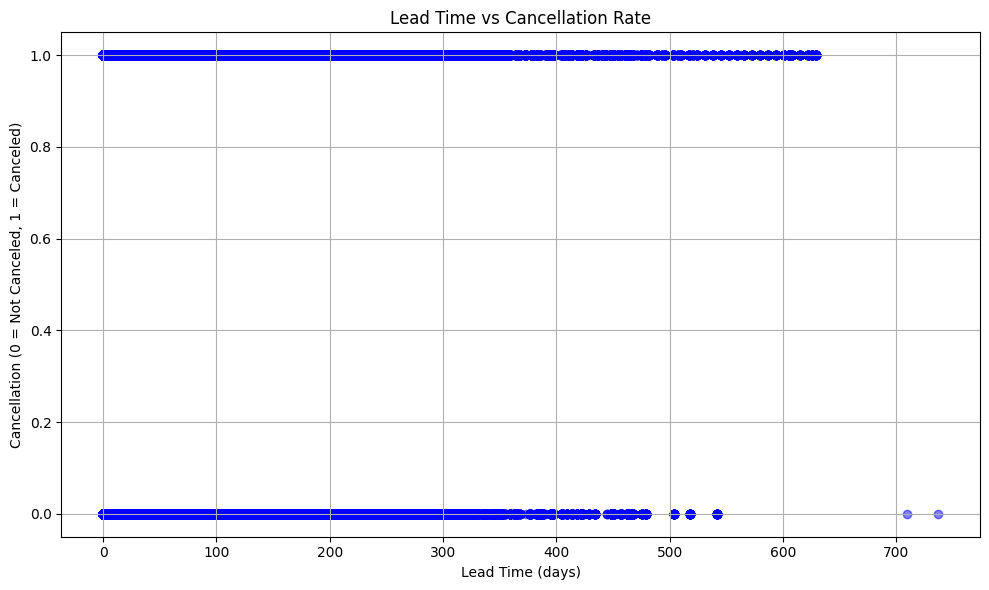

In [14]:
correlation = df['lead_time'].corr(df['is_canceled'])
print(f'Correlation between lead time and cancellation rate:{correlation:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(df['lead_time'], df['is_canceled'], alpha=0.5, color='blue')
plt.title('Lead Time vs Cancellation Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation (0 = Not Canceled, 1 = Canceled)')
plt.grid(True)
plt.tight_layout()
plt.show()

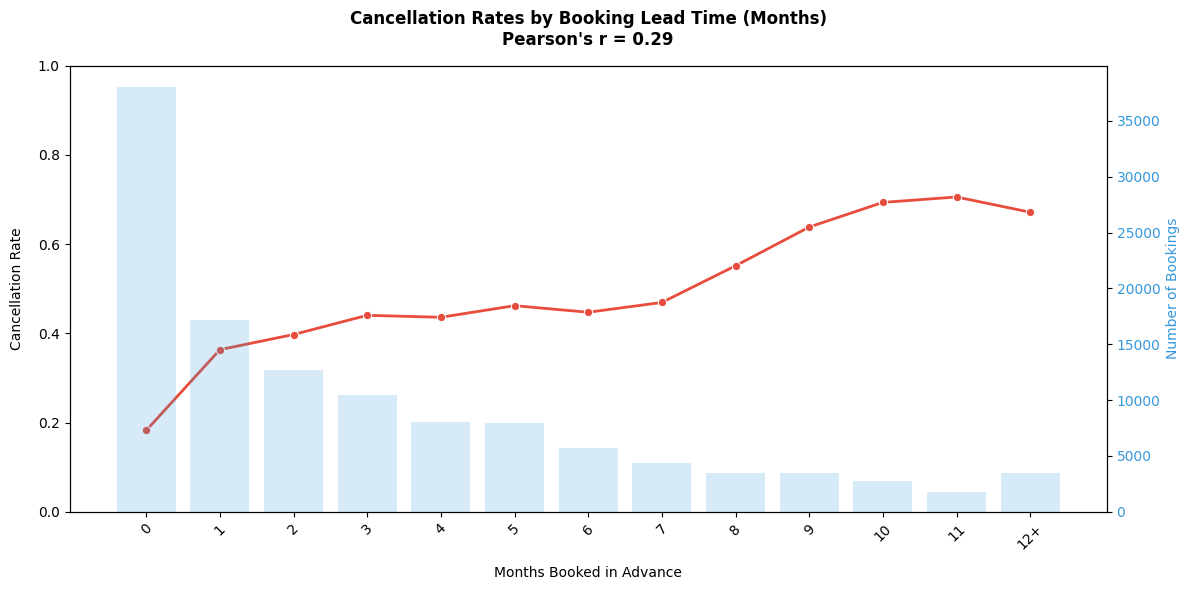

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("hotel_bookings.csv")

# Filter and clean data
analysis_df = df[['lead_time', 'is_canceled']].dropna()

# Convert lead time to months (30-day months) and cap at 12 months
analysis_df['lead_months'] = (analysis_df['lead_time'] // 30).clip(upper=12)
analysis_df['lead_months'] = analysis_df['lead_months'].apply(
    lambda x: f"{x}+" if x == 12 else str(x)
)

# Calculate cancellation rates by month group
monthly_cancel = analysis_df.groupby('lead_months')['is_canceled'].agg(['mean', 'count']).reset_index()
monthly_cancel.columns = ['Months_Booked_In_Advance', 'Cancellation_Rate', 'Booking_Count']

# Create proper month order for sorting
month_order = [str(x) for x in range(12)] + ['12+']
monthly_cancel['Months_Booked_In_Advance'] = pd.Categorical(
    monthly_cancel['Months_Booked_In_Advance'],
    categories=month_order,
    ordered=True
)
monthly_cancel = monthly_cancel.sort_values('Months_Booked_In_Advance')

# Calculate correlation manually
covariance = analysis_df['lead_time'].cov(analysis_df['is_canceled'])
std_lead = analysis_df['lead_time'].std()
std_cancel = analysis_df['is_canceled'].std()
correlation = covariance / (std_lead * std_cancel)

# Find highest cancellation group
max_cancel = monthly_cancel.loc[monthly_cancel['Cancellation_Rate'].idxmax()]

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x='Months_Booked_In_Advance',
    y='Cancellation_Rate',
    data=monthly_cancel,
    marker='o',
    color='#e74c3c',
    linewidth=2
)

# Formatting
plt.title(f"Cancellation Rates by Booking Lead Time (Months)\nPearson's r = {correlation:.2f}", 
          pad=15, fontweight='bold')
plt.xlabel("Months Booked in Advance", labelpad=10)
plt.ylabel("Cancellation Rate", labelpad=10)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add bar background for booking counts
ax2 = ax.twinx()
ax2.bar(
    monthly_cancel['Months_Booked_In_Advance'],
    monthly_cancel['Booking_Count'],
    alpha=0.2,
    color='#3498db'
)
ax2.set_ylabel('Number of Bookings', color='#3498db')
ax2.tick_params(axis='y', labelcolor='#3498db')

plt.tight_layout()
plt.show()